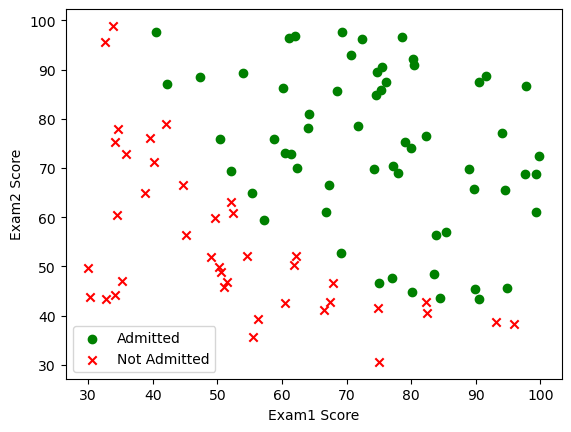

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file = open("./ex2data1.txt")
exam1_score_label = 'Exam1 Score'
exam2_score_label = 'Exam2 Score'
admitted_label = 'Admitted'
# 读取数据
datas = pd.read_csv("./ex2data1.txt", header=None, names=[exam1_score_label, exam2_score_label, admitted_label])

# 绘图
positive = datas[datas[admitted_label].isin([1])]
negative = datas[datas[admitted_label].isin([0])]

plt.scatter(x=positive[exam1_score_label], y=positive[exam2_score_label], marker='o', label='Admitted', color='g')
plt.scatter(x=negative[exam1_score_label], y=negative[exam2_score_label], marker='x', label="Not Admitted", color='r')

plt.legend()
plt.xlabel(exam1_score_label)
plt.ylabel(exam2_score_label)
plt.show()

In [36]:
# 处理数据

# 这个判断防止写脚本的时候多次插入bias行
if 'bias' not in datas.columns:
    datas.insert(0, 'bias', 1)
datas.head()
x = np.matrix(datas.iloc[:, 0:3])
y = np.matrix(datas.iloc[:, 3:4])
# theta = np.matrix(np.zeros(x.shape[1]))
theta = np.zeros((x.shape[1], 1))

In [37]:
# 定义预测函数
def h_fun(x_param, theta_param):
    return sigmoid(x_param * theta_param)


# 定义sigmoid函数
def sigmoid(z_param):
    return 1 / (1 + np.exp(-z_param))


# 定义损失函数
def j_fun(x_param, y_param, theta_param):
    tmp = h_fun(x_param, theta_param)
    # print(-np.sum(np.multiply(y_param, np.log(tmp)) + np.multiply(1 - y_param, np.log(1 - tmp))) / len(x_param))
    return -np.sum(np.multiply(y_param, np.log(tmp)) + np.multiply(1 - y_param, np.log(1 - tmp))) / len(x_param)


print(j_fun(x, y, theta))

0.6931471805599453
